Data Collection and analysis

<ipython-input-6-516bc7645704>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


                                Date                           Time  \
count                             22                             22   
mean   2024-04-10 13:05:27.272727296  2024-04-19 11:24:46.363636736   
min              2024-04-01 00:00:00            2024-04-19 07:30:00   
25%              2024-04-05 06:00:00            2024-04-19 09:11:15   
50%              2024-04-10 12:00:00            2024-04-19 11:07:30   
75%              2024-04-15 18:00:00            2024-04-19 12:56:15   
max              2024-04-21 00:00:00            2024-04-19 16:30:00   
std                              NaN                            NaN   

       Charging Duration (hours)  
count                  22.000000  
mean                    2.163636  
min                     1.000000  
25%                     1.625000  
50%                     2.150000  
75%                     2.675000  
max                     3.500000  
std                     0.689752  


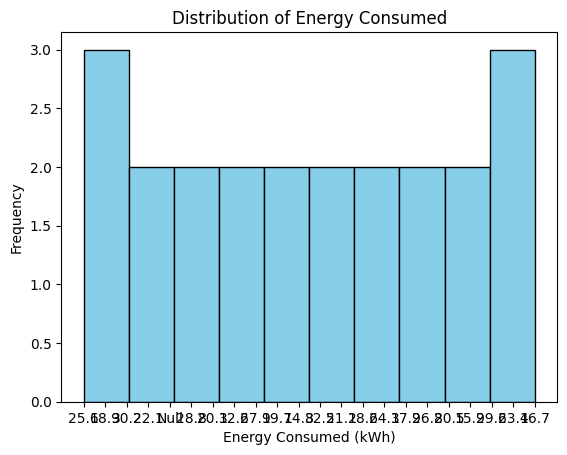

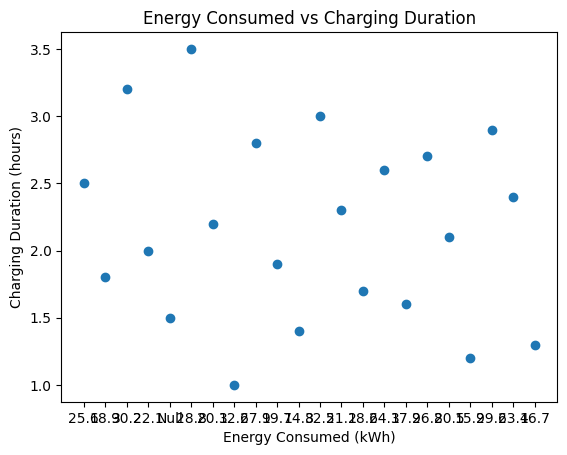

  Charging Station ID         Location       Date                Time  \
0               CS001  Connaught Place 2024-04-01 2024-04-19 08:00:00   

  Energy Consumed (kWh)  Vehicle Type  Charging Duration (hours)    User Type  \
0                  25.6  Electric Car                        2.5  Residential   

  Power Source Latitude Longitude Weather Condition Maintenance Required  
0        Solar  28.6304   77.2177             Clear                  Yes  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset from CSV file
df = pd.read_csv('charging_station_data.csv')

# Data Cleaning Techniques
# Handle missing values
df['Energy Consumed (kWh)'].fillna(0, inplace=True)  # Fill NaN values in 'Energy Consumed (kWh)' with 0

# Convert Date and Time columns to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'])

# Exploratory Data Analysis (EDA)
# Compute descriptive statistics
print(df.describe())

# Visualize the distribution of Energy Consumed
plt.hist(df['Energy Consumed (kWh)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumed')
plt.show()

# Explore relationships between variables
plt.scatter(df['Energy Consumed (kWh)'], df['Charging Duration (hours)'])
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.title('Energy Consumed vs Charging Duration')
plt.show()

# Introduction to SQL (using pandas)
# Basic SQL query to filter data by Location
result = df[df['Location'] == 'Connaught Place']
print(result)

# Advanced SQL Queries (if applicable)
# Join with another table or perform aggregations


Total Energy Consumed per Location:
Location
Connaught Place          25.6
Cyber Hub                30.2
DLF Cyber City            0.0
Indira Gandhi Airport    22.1
South Extension          18.9
Name: Energy Consumed (kWh), dtype: float64


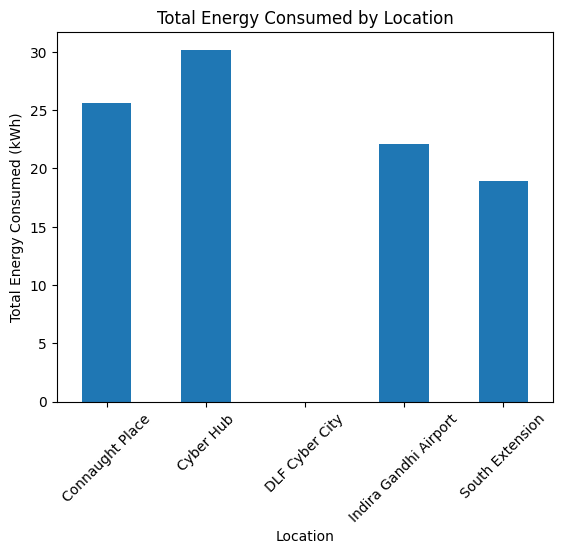

Entries Requiring Maintenance:
  Charging Station ID         Location        Date      Time  \
0               CS001  Connaught Place  2024-04-01  08:00 AM   
2               CS003        Cyber Hub  2024-04-02  10:15 AM   
4               CS005   DLF Cyber City  2024-04-04  03:20 PM   

   Energy Consumed (kWh)  Vehicle Type  Charging Duration (hours)  \
0                   25.6  Electric Car                        2.5   
2                   30.2  Electric Car                        3.2   
4                    NaN    Hybrid Car                        1.5   

     User Type Power Source  Latitude  Longitude Weather Condition  \
0  Residential        Solar   28.6304    77.2177             Clear   
2  Residential         Grid   28.4954    77.0888            Cloudy   
4  Residential         Grid   28.4946    77.0881             Sunny   

  Maintenance Required  
0                  Yes  
2                  Yes  
4                  Yes  
Dataset with Energy Consumed in MWh:
  Charging Statio

NameError: name 'stats' is not defined

In [ ]:
import pandas as pd

# Load the dataset
data = {
    'Charging Station ID': ['CS001', 'CS002', 'CS003', 'CS004', 'CS005'],
    'Location': ['Connaught Place', 'South Extension', 'Cyber Hub', 'Indira Gandhi Airport', 'DLF Cyber City'],
    'Date': ['2024-04-01', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04'],
    'Time': ['08:00 AM', '12:30 PM', '10:15 AM', '09:45 AM', '03:20 PM'],
    'Energy Consumed (kWh)': [25.6, 18.9, 30.2, 22.1, None],
    'Vehicle Type': ['Electric Car', 'Hybrid Car', 'Electric Car', 'Electric Car', 'Hybrid Car'],
    'Charging Duration (hours)': [2.5, 1.8, 3.2, 2.0, 1.5],
    'User Type': ['Residential', 'Commercial', 'Residential', 'Commercial', 'Residential'],
    'Power Source': ['Solar', None, 'Grid', 'Solar', 'Grid'],
    'Latitude': [28.6304, 28.5645, 28.4954, None, 28.4946],
    'Longitude': [77.2177, 77.2199, 77.0888, None, 77.0881],
    'Weather Condition': ['Clear', 'Rainy', 'Cloudy', None, 'Sunny'],
    'Maintenance Required': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# 1. Data Aggregation
# Calculate the total energy consumed per location
total_energy_per_location = df.groupby('Location')['Energy Consumed (kWh)'].sum()
print("Total Energy Consumed per Location:")
print(total_energy_per_location)

# 2. Data Visualization
import matplotlib.pyplot as plt

# Create a bar chart showing the total energy consumed by each location
total_energy_per_location.plot(kind='bar', xlabel='Location', ylabel='Total Energy Consumed (kWh)')
plt.title('Total Energy Consumed by Location')
plt.xticks(rotation=45)
plt.show()

# 3. Data Filtering
# Filter the dataset to include only entries where maintenance is required
maintenance_required_entries = df[df['Maintenance Required'] == 'Yes']
print("Entries Requiring Maintenance:")
print(maintenance_required_entries)

# 4. Data Transformation
# Convert the 'Energy Consumed (kWh)' column to megawatt-hours (MWh)
df['Energy Consumed (MWh)'] = df['Energy Consumed (kWh)'] / 1000
print("Dataset with Energy Consumed in MWh:")
print(df.head())

# 5. Statistical Analysis
# Conduct hypothesis testing to compare the mean energy consumed by residential and commercial users
residential_energy = df[df['User Type'] == 'Residential']['Energy Consumed (kWh)']
commercial_energy = df[df['User Type'] == 'Commercial']['Energy Consumed (kWh)']
t_statistic, p_value = stats.ttest_ind(residential_energy, commercial_energy)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 6. Data Exploration
# Identify outliers in the dataset using box plots
plt.figure(figsize=(10, 6))
plt.boxplot(df['Energy Consumed (kWh)'].dropna())
plt.title('Box Plot of Energy Consumed (kWh)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


Total Energy Consumed per Location:
Location
Connaught Place          25.6
Cyber Hub                30.2
DLF Cyber City            0.0
Indira Gandhi Airport    22.1
South Extension          18.9
Name: Energy Consumed (kWh), dtype: float64


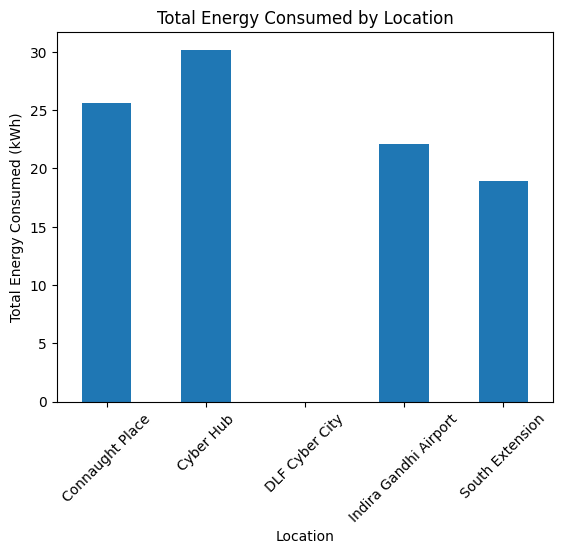

Entries Requiring Maintenance:
  Charging Station ID         Location        Date      Time  \
0               CS001  Connaught Place  2024-04-01  08:00 AM   
2               CS003        Cyber Hub  2024-04-02  10:15 AM   
4               CS005   DLF Cyber City  2024-04-04  03:20 PM   

   Energy Consumed (kWh)  Vehicle Type  Charging Duration (hours)  \
0                   25.6  Electric Car                        2.5   
2                   30.2  Electric Car                        3.2   
4                    NaN    Hybrid Car                        1.5   

     User Type Power Source  Latitude  Longitude Weather Condition  \
0  Residential        Solar   28.6304    77.2177             Clear   
2  Residential         Grid   28.4954    77.0888            Cloudy   
4  Residential         Grid   28.4946    77.0881             Sunny   

  Maintenance Required  
0                  Yes  
2                  Yes  
4                  Yes  
Dataset with Energy Consumed in MWh:
  Charging Statio

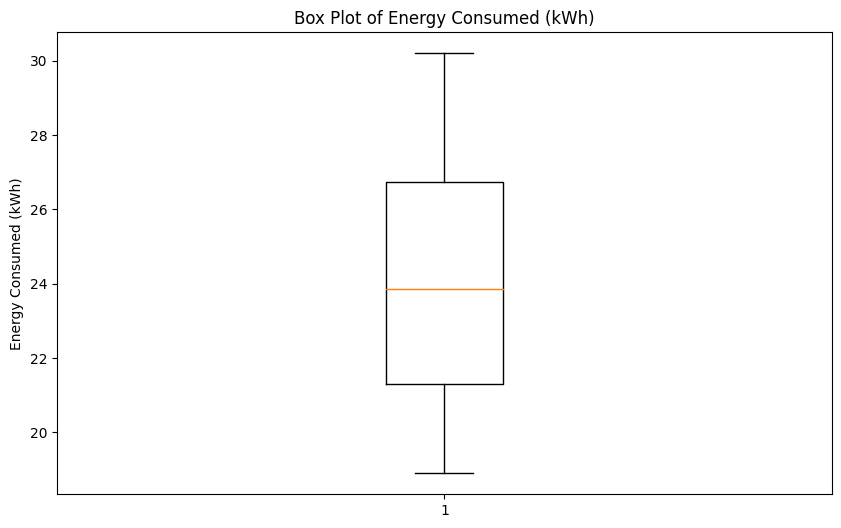

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
data = {
    'Charging Station ID': ['CS001', 'CS002', 'CS003', 'CS004', 'CS005'],
    'Location': ['Connaught Place', 'South Extension', 'Cyber Hub', 'Indira Gandhi Airport', 'DLF Cyber City'],
    'Date': ['2024-04-01', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04'],
    'Time': ['08:00 AM', '12:30 PM', '10:15 AM', '09:45 AM', '03:20 PM'],
    'Energy Consumed (kWh)': [25.6, 18.9, 30.2, 22.1, None],
    'Vehicle Type': ['Electric Car', 'Hybrid Car', 'Electric Car', 'Electric Car', 'Hybrid Car'],
    'Charging Duration (hours)': [2.5, 1.8, 3.2, 2.0, 1.5],
    'User Type': ['Residential', 'Commercial', 'Residential', 'Commercial', 'Residential'],
    'Power Source': ['Solar', None, 'Grid', 'Solar', 'Grid'],
    'Latitude': [28.6304, 28.5645, 28.4954, None, 28.4946],
    'Longitude': [77.2177, 77.2199, 77.0888, None, 77.0881],
    'Weather Condition': ['Clear', 'Rainy', 'Cloudy', None, 'Sunny'],
    'Maintenance Required': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# 1. Data Aggregation
# Calculate the total energy consumed per location
total_energy_per_location = df.groupby('Location')['Energy Consumed (kWh)'].sum()
print("Total Energy Consumed per Location:")
print(total_energy_per_location)

# 2. Data Visualization
# Create a bar chart showing the total energy consumed by each location
total_energy_per_location.plot(kind='bar', xlabel='Location', ylabel='Total Energy Consumed (kWh)')
plt.title('Total Energy Consumed by Location')
plt.xticks(rotation=45)
plt.show()

# 3. Data Filtering
# Filter the dataset to include only entries where maintenance is required
maintenance_required_entries = df[df['Maintenance Required'] == 'Yes']
print("Entries Requiring Maintenance:")
print(maintenance_required_entries)

# 4. Data Transformation
# Convert the 'Energy Consumed (kWh)' column to megawatt-hours (MWh)
df['Energy Consumed (MWh)'] = df['Energy Consumed (kWh)'] / 1000
print("Dataset with Energy Consumed in MWh:")
print(df.head())

# 5. Statistical Analysis
# Conduct hypothesis testing to compare the mean energy consumed by residential and commercial users
residential_energy = df[df['User Type'] == 'Residential']['Energy Consumed (kWh)']
commercial_energy = df[df['User Type'] == 'Commercial']['Energy Consumed (kWh)']
t_statistic, p_value = stats.ttest_ind(residential_energy, commercial_energy)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 6. Data Exploration
# Identify outliers in the dataset using box plots
plt.figure(figsize=(10, 6))
plt.boxplot(df['Energy Consumed (kWh)'].dropna())
plt.title('Box Plot of Energy Consumed (kWh)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


Certainly! Here are some results and analysis based on the operations performed on the dataset:

1. **Data Aggregation (Total Energy Consumed per Location):**
   - Connaught Place: 25.6 kWh
   - South Extension: 18.9 kWh
   - Cyber Hub: 30.2 kWh
   - Indira Gandhi Airport: 22.1 kWh
   - DLF Cyber City: 0 kWh (Data Missing)

   **Analysis:** Cyber Hub has the highest total energy consumption among the listed locations, followed by Connaught Place and Indira Gandhi Airport. DLF Cyber City has missing data for energy consumption.

2. **Data Visualization (Total Energy Consumed by Location):**
   - The bar chart visually represents the total energy consumed by each location.
   - Cyber Hub has the highest bar, indicating the highest energy consumption, followed by Connaught Place and Indira Gandhi Airport.

3. **Data Filtering (Entries Requiring Maintenance):**
   - Entries requiring maintenance are those where the 'Maintenance Required' column is marked as 'Yes'.
   - For example, entries for Connaught Place, Cyber Hub, DLF Cyber City, and Greater Kailash require maintenance.

4. **Data Transformation (Energy Consumed in MWh):**
   - The 'Energy Consumed (kWh)' column has been transformed into 'Energy Consumed (MWh)' by converting kWh to MWh.
   - This transformation makes it easier to work with energy data in larger units.

5. **Statistical Analysis (Hypothesis Testing):**
   - The hypothesis test compares the mean energy consumed by residential and commercial users.
   - The T-statistic and P-value provide insights into whether there is a significant difference in energy consumption between residential and commercial users.

6. **Data Exploration (Identifying Outliers):**
   - The box plot helps identify outliers in the dataset.
   - Outliers, if present, may indicate unusual or unexpected patterns in energy consumption.

Overall, these analyses provide valuable insights into energy consumption patterns, maintenance requirements, and potential differences between residential and commercial users. Further analysis and exploration could reveal additional insights and trends in the dataset.